In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from src.testbed.const import *
from typing import List, Union

sns.set_style("whitegrid")
sns.set_context("notebook")
Number = Union[int, float]

services = {}
for key, model_name in ID_2_MODEL.items():
    services[model_name] = SERVICES[0][key]

In [2]:
services

{'AlexNet': {'accuracy': 0.56522,
  'comm_cost': 1,
  'comp_cost': 129257051.19,
  'stor_cost': 1},
 'DenseNet': {'accuracy': 0.77138,
  'comm_cost': 1,
  'comp_cost': 1288675947.21,
  'stor_cost': 1},
 'GoogLeNet': {'accuracy': 0.69778,
  'comm_cost': 1,
  'comp_cost': 367018478.63,
  'stor_cost': 1},
 'MobileNet': {'accuracy': 0.71878,
  'comm_cost': 1,
  'comp_cost': 158662135.32,
  'stor_cost': 1},
 'ResNet': {'accuracy': 0.69758,
  'comm_cost': 1,
  'comp_cost': 267029373.18,
  'stor_cost': 1},
 'SqueezeNet': {'accuracy': 0.58092,
  'comm_cost': 1,
  'comp_cost': 213847898.91,
  'stor_cost': 1}}

In [3]:
def analyze(num_requests: int, comp_capacities: List[Number]):
    data = defaultdict(list)
    for m in services:
        for comp_capacity in comp_capacities:
            comp_cost = services[m]["comp_cost"]
            comp_delay = (comp_cost * num_requests) / comp_capacity
            data["comp_capacity"].append(comp_capacity)
            data["comp_cost"].append(comp_cost)
            data["comp_delay"].append(comp_delay)
            data["model"].append(m)
    return pd.DataFrame.from_dict(data)

In [14]:
capacities = [3.2e6, 3.2e7, 3.2e8, 3.2e9]
data = analyze(300, capacities)

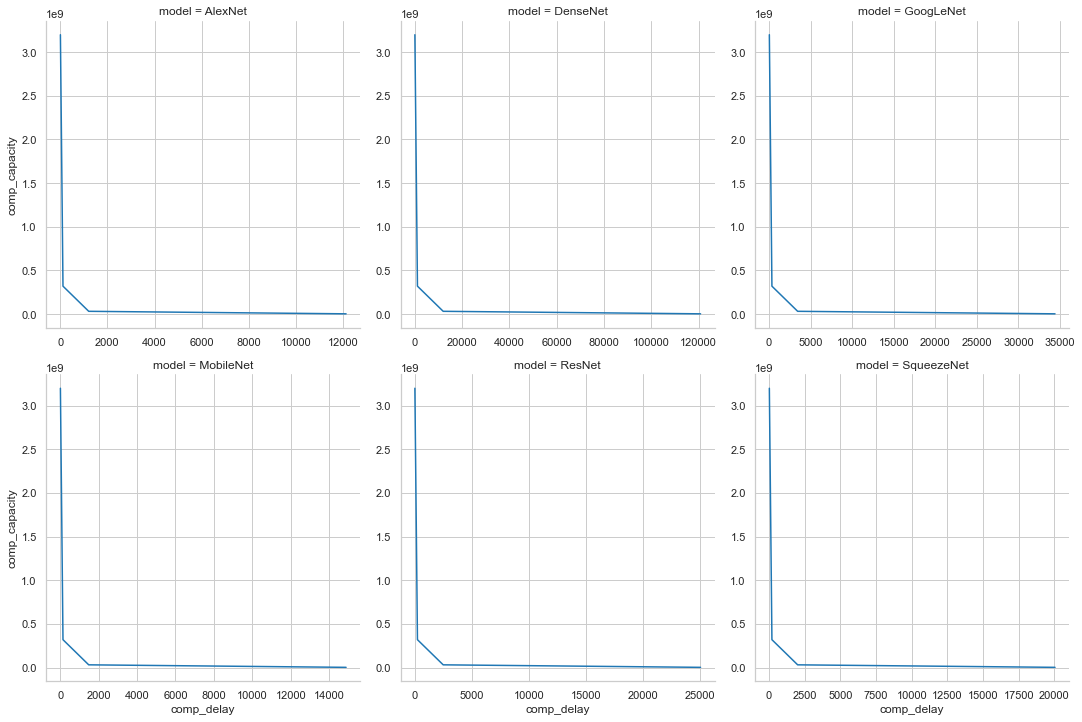

In [15]:
sns.relplot(
    data=data, 
    kind="line",
    x="comp_delay", 
    y="comp_capacity",
    col="model", 
    col_wrap=3, 
    facet_kws={"sharex": False, "sharey": False}
    # sharex=False,
    # sharey=False
)
plt.show()

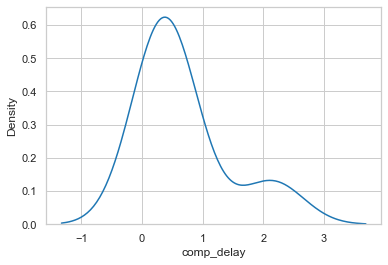

In [39]:
capacities = [1.8e9*100]
data = analyze(300, capacities)
sns.kdeplot(
    data=data, 
    x="comp_delay", 
)
plt.show()